<a href="https://colab.research.google.com/github/zhukuixi/Udacity_DataScientistNanoDegree/blob/main/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("/content/survey-results-public.csv")
schema = pd.read_csv("/content/survey-results-schema.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q1: How to break into the field? - CousinEduaction

Check the description of CousinEduaction 

In [26]:
print(schema.loc[schema.Column == 'CousinEducation','Question'].values)

["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which

In [27]:
cous_ed_vals = df.CousinEducation.value_counts()
cous_ed_vals

Take online courses; Buy books and work through the exercises                                         711
Take online courses                                                                                   551
None of these                                                                                         523
Take online courses; Part-time/evening courses; Buy books and work through the exercises              479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises    465
                                                                                                     ... 
Master's degree; Contribute to open source; Part-time/evening courses; Participate in hackathons        1
Return to college; Participate in online coding competitions; Conferences/meet-ups; Other               1
Return to college; Get a job as a QA tester; Participate in hackathons; Other                           1
Return to college; Participate in hackathons; 

We see that each row of CousinEducation contains many methods separated 
by a delimiter ";".   
Thus we need to separate the methods.

In [28]:
# I create a function to count the method within CousinEducation column
def fun(df,title,plot):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot

        plot - bool providing whether or not you want a plot back

    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
		# Separate methods
    methods=[ele for row in list(df.CousinEducation.dropna().str.split(";")) for ele in row ] 
    cous_ed_vals = pd.Series(methods).str.strip().value_counts()

		# Get the percentage of each method
    cous_ed_vals = cous_ed_vals/cous_ed_vals.sum()		
    study_df = cous_ed_vals.reset_index()
    study_df.columns=["method","percent"]
    study_df.set_index('method',inplace=True)
    if plot:
        study_df.plot(kind="bar",legend=None)
        plt.title(title)
        plt.show()
    return study_df

## The method suggested by population with different education

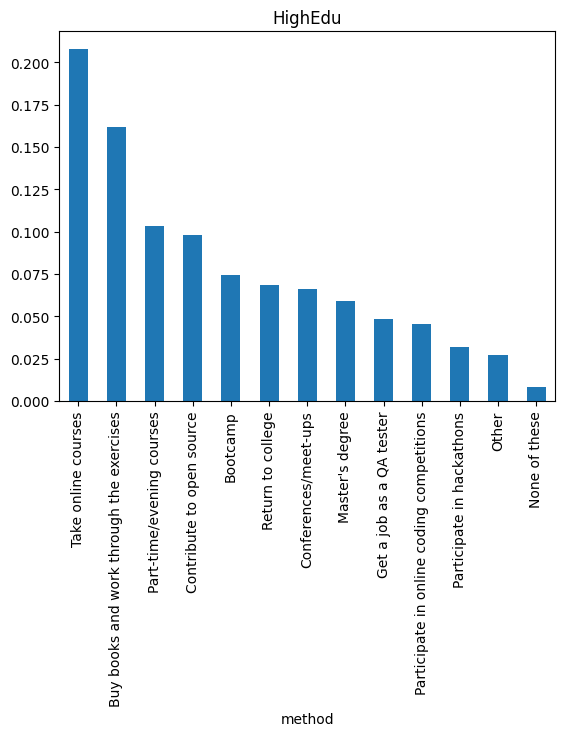

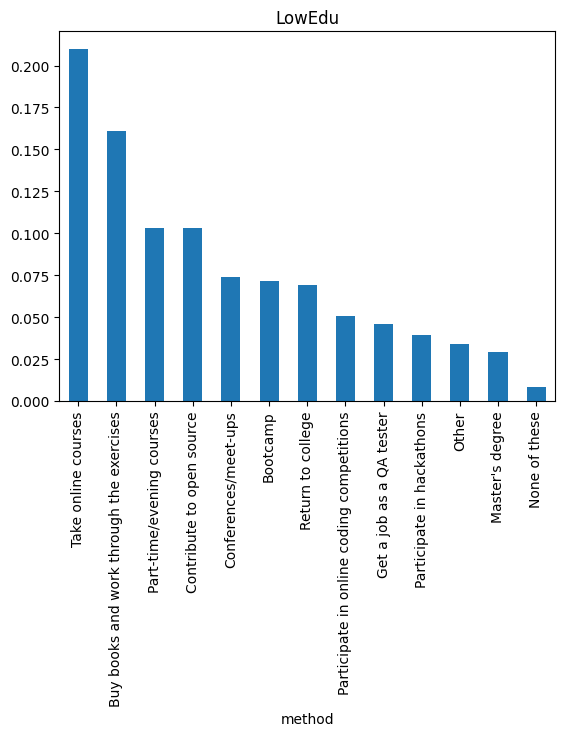

,percent_high,percent_low,Diff
method,,,
Bootcamp,0.074617,0.071824,-0.002793
Buy books and work through the exercises,0.162073,0.161205,-0.000868
Conferences/meet-ups,0.065842,0.073920,0.008078
Contribute to open source,0.097821,0.103230,0.005409
Get a job as a QA tester,0.048469,0.045739,-0.002730
Master's degree,0.058952,0.029346,-0.029606
None of these,0.008363,0.008277,-0.000086
Other,0.026973,0.033861,0.006888
Part-time/evening courses,0.103298,0.103248,-0.000050


In [29]:
# Get low and high education df respectively
df_highEdu = df[df.FormalEducation.isin(["Master's degree", "Professional degree"])]
df_lowEdu = df[~df.FormalEducation.isin(["Master's degree", "Professional degree"])]
# Obtain the method percentage in each group
highEdu_per = fun(df_highEdu,"HighEdu",True)
lowEdu_per = fun(df_lowEdu,"LowEdu",True)
# Combine and draw the barplot
combine_per = highEdu_per.join(lowEdu_per,how="outer",lsuffix="_high",rsuffix="_low")
combine_per.fillna(0,inplace=True)
combine_per['Diff'] = combine_per.percent_low - combine_per.percent_high
combine_per.style.bar(subset=['Diff'], align='mid', color=['#d65f5f', '#5fba7d'])

## The salary distribution of population suggesting different methods

In [92]:
temp_df = df[['CousinEducation','Salary']].dropna()

def getMethod(input_row):
  methods = [method.strip() for method in input_row.CousinEducation.split(";")]
  return pd.DataFrame({"method":methods,"Salary":input_row.Salary})

result_df = pd.DataFrame()
for i in np.arange(temp_df.shape[0]):
  d = getMethod(temp_df.iloc[i,:])
  result_df = pd.concat([result_df,d],axis=0)


In [94]:
result_df.groupby("method")['Salary'].agg(['mean','std',('lower_95',lambda x:x.mean()-np.std(x)*1.96) ]).sort_values('mean')

,mean,std,lower_95
method,,,
Participate in online coding competitions,46537.703161,37539.951689,-27001.075795
None of these,48009.706357,39038.734482,-28163.858403
Part-time/evening courses,53119.613118,39594.231740,-24466.749996
Take online courses,53740.566104,39841.876501,-24340.825029
Buy books and work through the exercises,56257.071544,40274.403123,-22669.132119
Get a job as a QA tester,56654.043442,40606.474293,-22896.113761
Conferences/meet-ups,57770.118326,40576.908734,-21736.935305
Participate in hackathons,58237.114855,41050.873430,-22172.104617
Bootcamp,59046.391551,41876.732135,-23006.713527


#Q2: What does the data suggest about graduates of bootcamps, in terms of job placement and salary? 
- TimeAfterBootcamp

In [30]:
from scipy import stats 
import re


In [31]:
df.TimeAfterBootcamp.value_counts(dropna=False)

NaN                                                              48790
I already had a job as a developer when I started the program     1193
Immediately upon graduating                                        294
I got a job as a developer before completing the program           252
One to three months                                                228
I haven't gotten a job as a developer yet                          211
Less than a month                                                  156
Four to six months                                                 105
Longer than a year                                                  85
Six months to a year                                                78
Name: TimeAfterBootcamp, dtype: int64

In [32]:
df_bootcamp = df[~df.TimeAfterBootcamp.isna()]
df_nobootcamp = df[df.TimeAfterBootcamp.isna()]

## Difference in gender proportion

In [33]:
df_bootcamp['Gender'].value_counts()/sum(~df_bootcamp.Gender.isna())

Male                                                       0.863071
Female                                                     0.112494
Other                                                      0.006455
Gender non-conforming                                      0.005533
Male; Other                                                0.002766
Female; Gender non-conforming                              0.001383
Male; Gender non-conforming                                0.001383
Transgender; Gender non-conforming                         0.000922
Transgender                                                0.000922
Male; Female                                               0.000922
Female; Transgender; Gender non-conforming                 0.000922
Male; Female; Transgender; Gender non-conforming; Other    0.000922
Male; Transgender                                          0.000922
Male; Gender non-conforming; Other                         0.000461
Female; Gender non-conforming; Other            

In [34]:
df_nobootcamp['Gender'].value_counts()/sum(~df_nobootcamp.Gender.isna())

Male                                                       0.903857
Female                                                     0.071659
Other                                                      0.006418
Male; Other                                                0.005019
Gender non-conforming                                      0.004501
Male; Gender non-conforming                                0.001886
Female; Transgender                                        0.001703
Transgender                                                0.001612
Female; Gender non-conforming                              0.000791
Male; Female                                               0.000395
Transgender; Gender non-conforming                         0.000395
Male; Female; Transgender; Gender non-conforming; Other    0.000395
Male; Transgender                                          0.000274
Female; Transgender; Gender non-conforming                 0.000182
Male; Female; Transgender; Gender non-conforming

In [35]:
df_bootcamp_gender = (df_bootcamp['Gender'].value_counts()/sum(~df_bootcamp.Gender.isna())).reset_index()
df_nobootcamp_gender = (df_nobootcamp['Gender'].value_counts()/sum(~df_nobootcamp.Gender.isna())).reset_index()

df_study_gender = pd.merge(df_bootcamp_gender,df_nobootcamp_gender,on="index",how="outer").fillna(0)
df_study_gender.columns=['gender','bootcamp','non-bootcamp']
df_study_gender['Diff'] = df_study_gender['non-bootcamp'] -  df_study_gender['bootcamp']
df_study_gender.style.bar(subset=['Diff'], align='zero', color=['#d65f5f', '#5fba7d'])

,gender,bootcamp,non-bootcamp,Diff
0,Male,0.863071,0.903857,0.040786
1,Female,0.112494,0.071659,-0.040835
2,Other,0.006455,0.006418,-0.000037
3,Gender non-conforming,0.005533,0.004501,-0.001031
4,Male; Other,0.002766,0.005019,0.002252
5,Female; Gender non-conforming,0.001383,0.000791,-0.000592
6,Male; Gender non-conforming,0.001383,0.001886,0.000503
7,Transgender; Gender non-conforming,0.000922,0.000395,-0.000527
8,Transgender,0.000922,0.001612,0.000690
9,Male; Female,0.000922,0.000395,-0.000527


## Difference in Salary

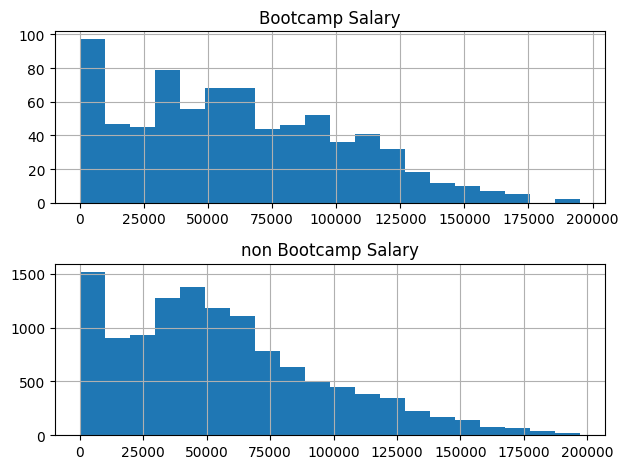

In [36]:
plt.subplot(211)
df_bootcamp['Salary'].hist(bins=20)
plt.title("Bootcamp Salary")
plt.subplot(212)
df_nobootcamp['Salary'].hist(bins=20)
plt.title("non Bootcamp Salary")
plt.tight_layout()

In [37]:
stats.ttest_ind(df_bootcamp['Salary'].dropna(),df_nobootcamp['Salary'].dropna(),alternative="greater")

Ttest_indResult(statistic=3.918603358972457, pvalue=4.4761814068970024e-05)

# EDA on Job Satisfication before modeling

## Employment Status v.s Average job satisfaction

Independent contractor rules!

In [38]:
df.groupby('EmploymentStatus')['JobSatisfaction'].mean()

EmploymentStatus
Employed full-time                                      6.926805
Employed part-time                                      6.821468
I prefer not to say                                          NaN
Independent contractor, freelancer, or self-employed    7.252823
Not employed, and not looking for work                  7.000000
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

## Company size v.s Average job satisfaction
It seems like smaller company makes happier employee!

In [39]:
df.CompanySize.value_counts()
df.groupby('CompanySize')['JobSatisfaction'].mean().sort_values()

CompanySize
5,000 to 9,999 employees    6.748153
10,000 or more employees    6.810345
I don't know                6.842679
500 to 999 employees        6.883661
1,000 to 4,999 employees    6.884509
100 to 499 employees        6.937089
20 to 99 employees          6.949092
10 to 19 employees          7.000799
Fewer than 10 employees     7.008749
I prefer not to answer      7.280835
Name: JobSatisfaction, dtype: float64

## Remote or not v.s Average job satisfaction


In [40]:
df.groupby(['HomeRemote']).mean()['JobSatisfaction'].sort_values().dropna()

HomeRemote
Never                                                      6.632502
It's complicated                                           6.840830
More than half, but not all, the time                      6.953184
About half the time                                        6.973702
A few days each month                                      7.077509
Less than half the time, but at least one day each week    7.120125
All or almost all the time (I'm full-time remote)          7.388430
Name: JobSatisfaction, dtype: float64

# Q3: How well can we predict an individual's salary? What variables correlate well with salary?

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


Let's start with the numeric features, we see that there are a lot of missing values

In [42]:
print(df.describe())
print(df.select_dtypes(include=["number"]).isna().mean())

         Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
count  51392.000000        42695.000000     40376.000000  20600.000000   
mean   25696.500000            7.300574         6.957078      3.952282   
std    14835.736854            1.955444         2.167652      7.564722   
min        1.000000            0.000000         0.000000      0.000000   
25%    12848.750000            6.000000         6.000000      1.000000   
50%    25696.500000            8.000000         7.000000      1.000000   
75%    38544.250000            9.000000         8.000000      4.000000   
max    51392.000000           10.000000        10.000000     40.000000   

       StackOverflowSatisfaction         Salary  ExpectedSalary  
count               36592.000000   12891.000000     2566.000000  
mean                    8.429875   56298.480641    33142.220468  
std                     1.390635   39880.905277    30162.988829  
min                     0.000000       0.000000        0.000000  
25%

## Dealing with missing value
 1. Remove the sample containing missing value
 2. Imputation
 3. Work around

### Option1: Remove all samples with NA

In [43]:
num_vars = df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction','Salary']]
# drop samples containing NA
all_rm = num_vars.dropna()
X = all_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = all_rm['Salary']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test,y_pred)

0.02989441006452942

### Option 2:Imputation

Here I tried out different imputation method.

https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/modules/impute.html#impute

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge, RidgeClassifier,Ridge
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold

drop_sal = num_vars.dropna(subset=['Salary'])
X = drop_sal[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction','Salary']]
y = drop_sal[['Salary']]

kf = KFold(5,shuffle=True,random_state=42)

## Simple Imputer
score_simpleImputer = pd.DataFrame()
simpleImputer_strategy = ['mean','median','most_frequent']
for i in np.arange(len(simpleImputer_strategy)):
  current_strategy = simpleImputer_strategy[i]
  pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy=current_strategy),
                Normalizer(),
                LinearRegression())
  score_simpleImputer[current_strategy] = cross_val_score(
        pipeline, X, y, scoring="r2", cv=kf
    )

## Iterative Imputer
iterative_estimators = [
    BayesianRidge(),
    RandomForestRegressor(
        # We tuned the hyperparameters of the RandomForestRegressor to get a good
        # enough predictive performance for a restricted execution time.
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
        max_samples=0.5,
        n_jobs=2,
        random_state=0,
    ),   
    KNeighborsRegressor(n_neighbors=15),
]
score_iterativeImputer = pd.DataFrame()
tolerances = (1e-3, 1e-1,  1e-2)

for impute_estimator, tol in zip(iterative_estimators, tolerances):
    estimator = make_pipeline(
        IterativeImputer(
            random_state=0, estimator=impute_estimator, max_iter=25, tol=tol
        ),
        Normalizer(),
        LinearRegression(),
    )
    score_iterativeImputer[impute_estimator.__class__.__name__] = cross_val_score(
        estimator, X, y, scoring="r2", cv=kf
    )

scores = pd.concat(
    [score_simpleImputer, score_iterativeImputer],
    keys=["SimpleImputer", "IterativeImputer"],
    axis=1,
)


In [45]:
scores

SimpleImputer                         IterativeImputer  \
           mean    median most_frequent    BayesianRidge   
0      0.030892  0.030535      0.030538         0.030731   
1      0.030953  0.030979      0.030983         0.030475   
2      0.033371  0.033648      0.033295         0.034046   
3      0.024584  0.022195      0.022537         0.024368   
4      0.026460  0.023539      0.023536         0.026511   

                                             
  RandomForestRegressor KNeighborsRegressor  
0              0.030231            0.031402  
1              0.031255            0.029722  
2              0.033851            0.032325  
3              0.021695            0.026434  
4              0.030289            0.029684

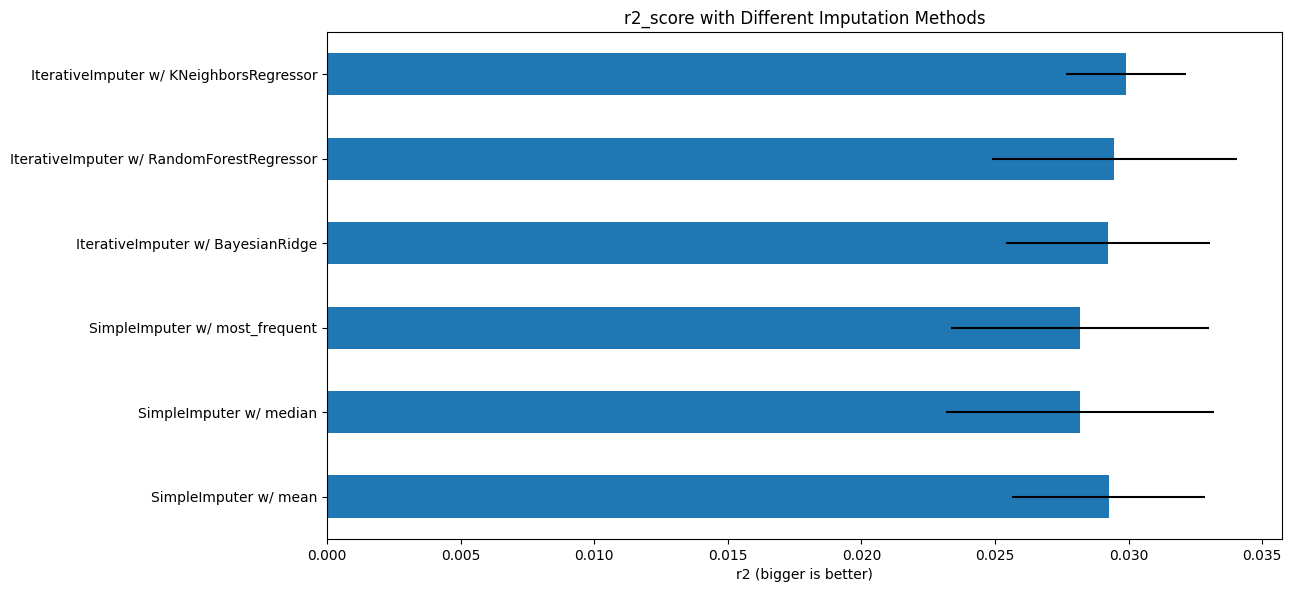

In [46]:
# plot california housing results
fig, ax = plt.subplots(figsize=(13, 6))
means = scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title("r2_score with Different Imputation Methods")
ax.set_xlabel("r2 (bigger is better)")
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

## Dealing with categorical value

In [47]:
from sklearn.metrics.pairwise import normalize
df = pd.read_csv("/content/survey-results-public.csv")
df = df.dropna(subset=['Salary'])
df = df.dropna(how='all',axis=1)

categorical_featureName = df.select_dtypes(include='object').columns.values
df_dummy = pd.get_dummies(df,prefix=categorical_featureName,dummy_na = False, drop_first=True)


In [ ]:
from sklearn import preprocessing
X = df_dummy.drop('Salary',axis=1)
X = SimpleImputer().fit_transform(X)
y = df_dummy['Salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
estimator = make_pipeline(preprocessing.Normalizer(), LinearRegression())
estimator.fit(X_train,y_train)
y_train_pred = estimator.predict(X_train)
y_test_pred = estimator.predict(X_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))




Too many features! we got OVERFITTING here!

array([1, 2])